In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [75]:
# ODE
def f(t, y):
    return t - 2 * t * y

# Exact solution
def analytical_solution(y0, t):
    return (y0 - 0.5) * np.exp(-t**2) + 0.5

# Forward Euler method implementation
def euler_method(y0, t0, tn, dt):
    t_values = np.arange(t0, tn + dt, dt)
    y_values = np.zeros(len(t_values))
    y_values[0] = y0
    
    for i in range(1, len(t_values)):
        # y_{n+1} = y_n + dt * f(t_n, y_n)
        y_values[i] = y_values[i - 1] + dt * f(t_values[i - 1], y_values[i - 1])
    
    return t_values, y_values

In [92]:
t0 = 0
tn = 3
y0_vals = [-1, 1]
dt_values = [0.3, 0.1]
colors = colors = ['red', 'blue', 'green', 'orange', 'black']

## Plotting the Solutions

In [93]:
def plot_solution(t0, tn, y0, solution, color="black", dt=0.01):
    num_t = int((tn - t0) / dt)
    t_exact = np.linspace(t0, tn, num_t)
    y_exact = solution(y0, t_exact)
    plt.plot(t_exact, y_exact, label=f"Analytical/Exact Solution with $y_0 = {y0}$ and $dt={dt}$", color=color, linewidth=2)
    plt.legend()
    plt.ylabel("$y(t)$")
    plt.xlabel("$t$")

In [94]:
def plot_numerical_solution(dt_values, t0, tn, y0, numerical_method, colors):
    for i, dt in enumerate(dt_values):
        t, y = euler_method(y0, t0, tn, dt)
        plt.plot(t, y, 'o-', label=f'Euler Method with: y0={y0}, dt={dt}', color=colors.pop(0), linewidth=2)
        plt.legend()

In [95]:
def plot_and_compare_solutions(dt_values, t0, tn, y0, analytical_solution, numerical_method, colors):
    plot_solution(t0, tn, y0, analytical_solution, color='black')
    plot_numerical_solution(dt_values, t0, tn, y0, numerical_method, colors)

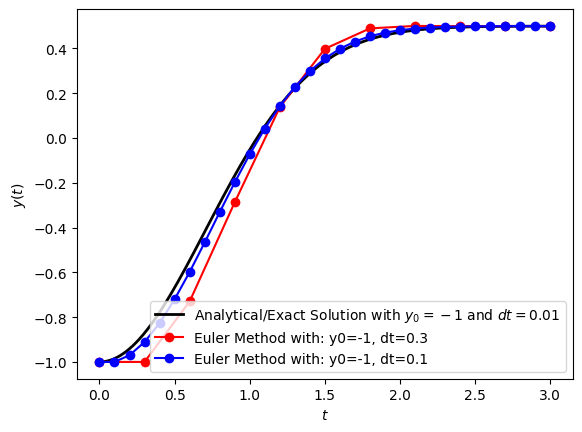

In [96]:
plot_and_compare_solutions(dt_values, t0, tn, y0_vals[0], analytical_solution, euler_method, colors)

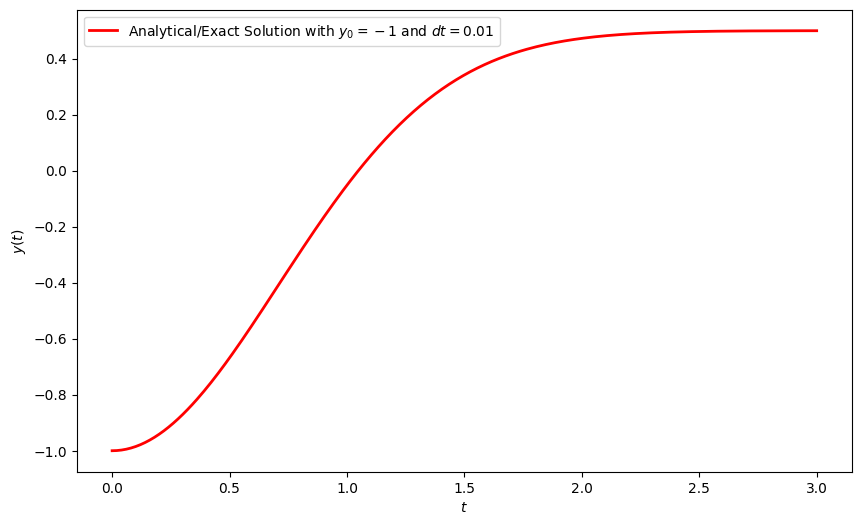

In [73]:
plt.figure(figsize=(10, 6))
plot_solution(t0, tn, y0_vals[0], analytical_solution, colors[0])
plt.show()

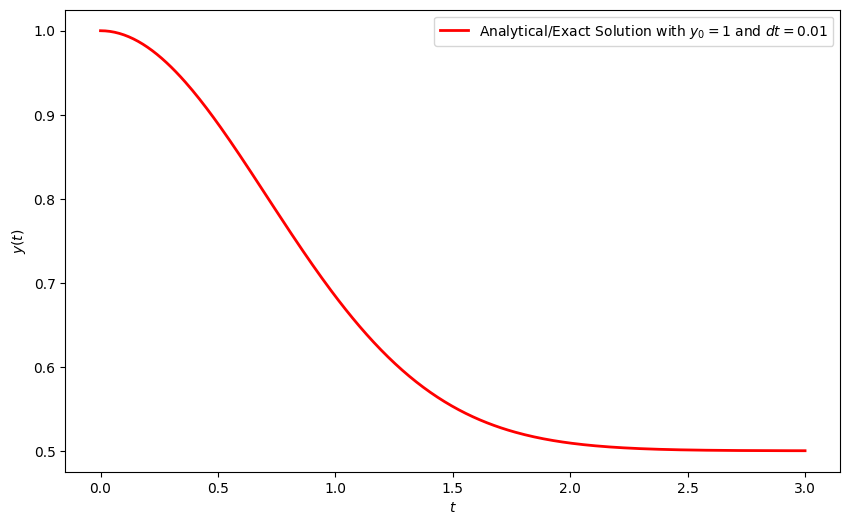

In [74]:
plt.figure(figsize=(10, 6))
plot_solution(t0, tn, y0_vals[1], analytical_solution, colors[0])
plt.show()

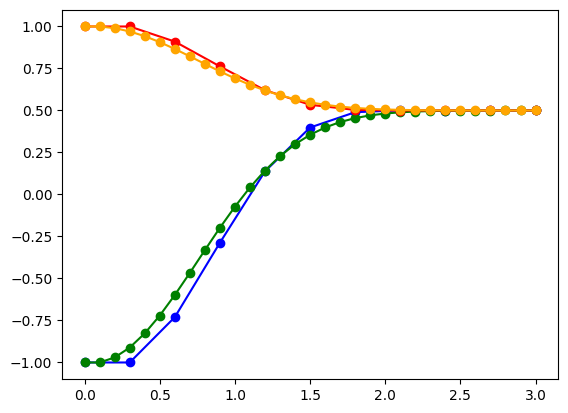

In [20]:
# Euler method for different initial conditions and time steps
colors = ['blue', 'green', 'red', 'orange']
for y0 in y0_vals:
    for i, dt in enumerate(dt_values):
        t_euler, y_euler = euler_method(y0, t0, tn, dt)
        plt.plot(t_euler, y_euler, 'o-', label=f'Euler y0={y0}, dt={dt}', color=colors.pop(0))

C:\Users\Teddy\AppData\Local\Temp\ipykernel_12540\759632463.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


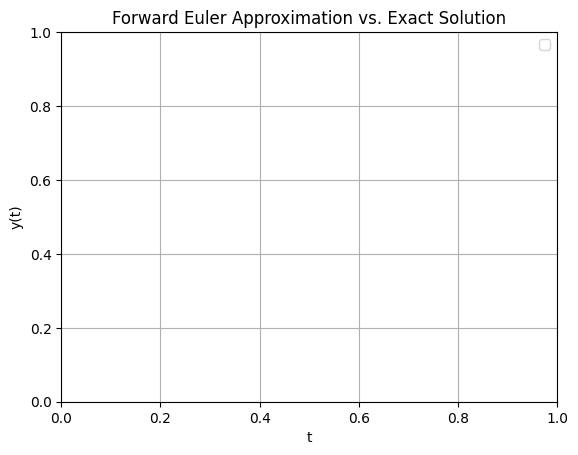

In [21]:
# Formatting the plot
plt.title("Forward Euler Approximation vs. Exact Solution")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.grid(True)
plt.show()